<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-03-tree-based-models-decision-tree-mob-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.3 Model-based Recursive Partitioning (MOB)

**Model-based Recursive Partitioning (MOB)** MOB is a powerful technique for analyzing complex datasets where relationships between variables may vary across different segments of the data. It is particularly useful in fields like epidemiology, finance, and social sciences, where understanding how relationships change across subgroups can provide valuable insights.




## Overview

MOBis a statistical method that combines the strengths of regression modeling and recursive partitioning (e.g., decision trees). It partitions data into subgroups based on covariates, where each subgroup is fitted with a parametric model (e.g., linear regression, logistic regression). MOB is particularly useful for detecting parameter instability in models across different subgroups and capturing heterogeneity in data.

MOB recursively splits the data into segments by testing whether model parameters vary significantly across partitions defined by partitioning variables. It balances model fit within subgroups and ensures that splits are statistically justified. This approach allows for a more nuanced understanding of the relationships between variables, as it can reveal how the effect of an explanatory variable on the response variable changes across different subgroups.


### Key Features of MOB

- `Model-based`: Fits a parametric model to each subgroup.
- `Recursive partitioning`: Splits data based on covariates that cause significant parameter instability.
- `Statistical rigor`: Uses formal statistical tests to decide splits, avoiding overfitting.
- `Flexibility`: Can be applied to various parametric models (e.g., linear, logistic, or generalized linear models).

### How it Works

Below is a step-by-step explanation of how MOB works, with a focus on clarity and conciseness:

1. Specify the Parametric Model

   - Define the parametric model to fit the data (e.g., linear regression: $Y = \beta_0 + \beta_1X + \epsilon$).
   - Identify the response variable ($Y$), explanatory variables ($X$), and potential partitioning variables ($Z$) that may induce parameter instability (e.g., age, gender).

2. Fit the Model to the Entire Dataset

   - Estimate the parameters of the model (e.g., $\beta_0, \beta_1$) using the full dataset.
   - This serves as the baseline model before partitioning.

3. Test for Parameter Instability

   - For each partitioning variable $Z_j$ (e.g., age, gender), perform a statistical test to check if the model parameters vary significantly across different values of $Z_j$.
   - Common tests include fluctuation tests or score-based tests (e.g., generalized M-fluctuation tests).
   - The null hypothesis ($H_0$) is that the parameters are stable across all values of $Z_j$. If $H_0$ is rejected, a split is justified.

4. Select the Partitioning Variable and Split Point

   - Among all partitioning variables, choose the one with the most significant parameter instability (e.g., smallest p-value or largest test statistic).
   - For continuous partitioning variables, select the optimal split point (e.g., age < 30 vs. age ≥ 30) that maximizes the improvement in model fit or minimizes a criterion like AIC/BIC.
   - For categorical variables, splits are based on category groupings.

5. Split the Data

   - Divide the dataset into two (or more) subgroups based on the selected partitioning variable and split point.
   - For example, if age is chosen with a split at 30, create two subsets: one for age < 30 and one for age ≥ 30.

6. Fit Models to Subgroups

   - Fit the specified parametric model to each subgroup separately, estimating new parameters for each.
   - This allows the model to capture heterogeneity in the subgroups.

7. Repeat the Process Recursively

   - For each subgroup, repeat steps 3–6: test for parameter instability, select a partitioning variable and split point, split the data, and fit models.
   - Continue partitioning until no further significant parameter instability is detected (e.g., `p-values` exceed a threshold) or a stopping criterion is met (e.g., minimum subgroup size, maximum tree depth).

8. Apply Stopping Criteria

   - Stop partitioning when:
     - No partitioning variable shows significant parameter instability.
     - The subgroup size is too small (user-defined minimum size).
     - A maximum number of splits or tree depth is reached.
     - Model fit improvements are negligible (e.g., based on A`IC/BIC`).

9. Output the Partitioned Model
   - The final output is a tree-like structure where each terminal node (leaf) represents a subgroup with its own fitted parametric model.
   - Each node includes the estimated parameters and details of the splits (e.g., variable and split point).

10. Interpret and Validate
    - Interpret the tree to understand how covariates influence parameter heterogeneity.
    - Validate the model using techniques like cross-validation or out-of-sample testing to ensure generalizability and avoid overfitting.


The below figure summarizes the workflow of a Model-based Recursive Partitioning (MOB):

![alt text](http://drive.google.com/uc?export=view&id=1tbjXNKju9Zaivx67AzTn3wHOX3C4CotK)


### Advantages of MOB

- Captures heterogeneity in model parameters across subgroups.
- Statistically rigorous due to formal hypothesis testing.
- Interpretable tree structure with parametric models in each node.

### Limitations

- Computationally intensive for large datasets or many partitioning variables.
- Assumes the parametric model is correctly specified.
- May overfit if stopping criteria are not stringent.

## Setup R in Python Runtype

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314978 sha256=30a8a41415fbbcf2212dabd8a468958fdae1a0d99583aecac28754e3919e8e32
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  Model-based Recursive Partitioning (MOB) in R from Scratch

To perform Model-based Recursive Partitioning (MOB) in R without using any packages (e.g., `partykit`), we’ll implement the algorithm from scratch using base R. We’ll follow the steps outlined in your flowchart, using synthetic data with a linear regression model as the parametric model. The implementation will include fitting linear models, testing for parameter instability, selecting split points, and recursively partitioning the data, all without external packages. The code will be concise yet complete, with explanations for each step.

### Data




In [3]:
%%R
# Set random seed for reproducibility
set.seed(123)

# Step 1: Generate Synthetic Data
n <- 200
X <- rnorm(n, 0, 1)  # Explanatory variable
Z1 <- runif(n, 20, 80)  # Continuous partitioning variable (age-like)
Z2 <- sample(c(0, 1), n, replace = TRUE)  # Categorical partitioning variable (gender-like)
epsilon <- rnorm(n, 0, 0.5)  # Noise

# Response variable with heterogeneity based on Z1
Y <- ifelse(Z1 < 50, 1 + 2 * X + epsilon, 3 + 0.5 * X + epsilon)

# Create data frame
data <- data.frame(Y = Y, X = X, Z1 = Z1, Z2 = Z2)

### Define Functions for MOB

This R code implements Model-based Recursive Partitioning (MOB) in base R without external packages, following the flowchart for partitioning data based on parameter instability in a linear regression model. Below is a brief explanation of each function:

1. `fit_lm(data, x_col, y_col)`:
   - Fits a linear regression model ($Y \sim X$)) using `lm` on the input data.
   - Inputs: `data` (data frame), `x_col` (explanatory variable name), `y_col` (response variable name).
   - Returns: A list with model coefficients (`params`), residuals (`resid`), and the model object (`model`).

2. `instability_test(data, x_col, y_col, z_col, is_continuous = TRUE)`:
   - Tests for parameter instability in the linear model across values of a partitioning variable $Z$).
   - For **continuous** $Z$):
     - Tests multiple split points (10th to 90th percentiles of $Z$).
     - Splits data into two groups at each point, fits models, and computes a test statistic: sum of squared parameter differences divided by residual variance.
     - Selects the split with the highest statistic.
     - Computes a p-value using a chi-squared test (2 df).
   - For **categorical** $Z$:
     - Compares parameters for each category against the full model’s parameters.
     - Uses the same test statistic and p-value calculation.
   - Returns: List with test statistic (`stat`), p-value (`p_value`), and best split point (`split`, NULL for categorical).

3. `mob_split(data, x_col, y_col, z_cols, alpha = 0.05, min_size = 20)`:
   - Identifies the best partitioning variable and split point among `z_cols`.
   - Calls `instability_test` for each $Z$, selecting the one with the lowest p-value (most significant instability).
   - If p-value < `alpha`, splits data:
     - Continuous: Splits at the best point (e.g., $Z_1 < 50$).
     - Categorical: Splits on the most frequent category vs. others.
   - Ensures subgroups have at least `min_size` observations.
   - Returns: List with selected variable (`z`), split point (`split`), subgroups (`group1`, `group2`), and split description (`split_info`).

4. `mob_recursive(data, x_col, y_col, z_cols, alpha = 0.05, min_size = 20, max_depth = 3, depth = 0)`:
   - Recursively partitions data:
     - Stops if `depth >= max_depth` or `nrow(data) < min_size`, returning a leaf node with model parameters.
     - Calls `mob_split` to find the best split.
     - If no valid split, returns a leaf node.
     - Otherwise, recurses on subgroups (`group1`, `group2`), building a tree.
   - Returns: A tree node (list) with split details or leaf parameters.

5. `print_tree(node, indent = "")`:
   - Prints the tree structure:
     - For leaves: Displays sample size and model parameters.
     - For splits: Shows split condition and recursively prints left/right subtrees with indentation.


In [4]:
%%R
# Define Functions for MOB
# Fit linear regression model
fit_lm <- function(data, x_col, y_col) {
  model <- lm(data[[y_col]] ~ data[[x_col]])
  return(list(params = coef(model), resid = residuals(model), model = model))
}

# Parameter instability test
instability_test <- function(data, x_col, y_col, z_col, is_continuous = TRUE) {
  full_model <- fit_lm(data, x_col, y_col)
  params <- full_model$params
  resid_var <- var(full_model$resid)
  if (is_continuous) {
    # For continuous Z, test multiple split points
    z_values <- sort(unique(data[[z_col]]))
    z_values <- z_values[z_values > quantile(data[[z_col]], 0.1) &
                         z_values < quantile(data[[z_col]], 0.9)]  # Avoid extreme splits
    max_stat <- 0
    best_split <- NULL
    for (split in z_values) {
      group1 <- data[data[[z_col]] < split, ]
      group2 <- data[data[[z_col]] >= split, ]
      if (nrow(group1) < 20 || nrow(group2) < 20) next  # Minimum subgroup size
      params1 <- fit_lm(group1, x_col, y_col)$params
      params2 <- fit_lm(group2, x_col, y_col)$params
      # Test statistic: sum of squared parameter differences
      stat <- sum((params1 - params2)^2) / resid_var
      if (stat > max_stat) {
        max_stat <- stat
        best_split <- split
      }
    }
    p_value <- pchisq(max_stat, df = 2, lower.tail = FALSE)  # Chi-squared test
    return(list(stat = max_stat, p_value = p_value, split = best_split))
  } else {
    # For categorical Z, test across categories
    categories <- unique(data[[z_col]])
    stats <- numeric(length(categories))
    for (i in seq_along(categories)) {
      cat <- categories[i]
      group <- data[data[[z_col]] == cat, ]
      if (nrow(group) < 20) next
      params_g <- fit_lm(group, x_col, y_col)$params
      stats[i] <- sum((params - params_g)^2) / resid_var
    }
    max_stat <- max(stats, na.rm = TRUE)
    p_value <- pchisq(max_stat, df = 2, lower.tail = FALSE)
    return(list(stat = max_stat, p_value = p_value, split = NULL))
  }
}

# MOB split function
mob_split <- function(data, x_col, y_col, z_cols, alpha = 0.05, min_size = 20) {
  best_z <- NULL
  best_stat <- 0
  best_p <- 1
  best_split <- NULL
  for (z_col in z_cols) {
    is_continuous <- is.numeric(data[[z_col]])
    test <- instability_test(data, x_col, y_col, z_col, is_continuous)
    if (test$p_value < best_p) {
      best_p <- test$p_value
      best_stat <- test$stat
      best_z <- z_col
      best_split <- test$split
    }
  }
  if (best_p >= alpha || is.null(best_z)) {
    return(list(z = NULL, split = NULL, group1 = NULL, group2 = NULL, split_info = NULL))
  }
  if (is.numeric(data[[best_z]])) {
    group1 <- data[data[[best_z]] < best_split, ]
    group2 <- data[data[[best_z]] >= best_split, ]
    split_info <- paste0(best_z, " < ", round(best_split, 2))
  } else {
    mode_z <- names(sort(table(data[[best_z]]), decreasing = TRUE))[1]
    group1 <- data[data[[best_z]] == mode_z, ]
    group2 <- data[data[[best_z]] != mode_z, ]
    split_info <- paste0(best_z, " = ", mode_z)
  }
  if (nrow(group1) < min_size || nrow(group2) < min_size) {
    return(list(z = NULL, split = NULL, group1 = NULL, group2 = NULL, split_info = NULL))
  }
殊
  return(list(z = best_z, split = best_split, group1 = group1, group2 = group2, split_info = split_info))
}

# Recursive MOB function
mob_recursive <- function(data, x_col, y_col, z_cols, alpha = 0.05, min_size = 20, max_depth = 3, depth = 0) {
  if (depth >= max_depth || nrow(data) < min_size) {
    model <- fit_lm(data, x_col, y_col)
    return(list(params = model$params, n = nrow(data), depth = depth, leaf = TRUE))
  }
  split_result <- mob_split(data, x_col, y_col, z_cols, alpha, min_size)
  if (is.null(split_result$z)) {
    model <- fit_lm(data, x_col, y_col)
    return(list(params = model$params, n = nrow(data), depth = depth, leaf = TRUE))
  }
  left <- mob_recursive(split_result$group1, x_col, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
  right <- mob_recursive(split_result$group2, x_col, y_col, z_cols, alpha, min_size, max_depth, depth + 1)
  return(list(split_var = split_result$z, split_info = split_result$split_info,
              left = left, right = right, depth = depth, leaf = FALSE))
}

# Print tree structure
print_tree <- function(node, indent = "") {
  if (node$leaf) {
    cat(sprintf("%sLeaf: n=%d, params=[%.2f, %.2f]\n", indent, node$n, node$params[1], node$params[2]))
  } else {
    cat(sprintf("%sSplit: %s\n", indent, node$split_info))
    print_tree(node$left, paste0(indent, "  "))
    print_tree(node$right, paste0(indent, "  "))
  }
}

### Prediction function

- Predicts  $Y$ by traversing tree: applies leaf’s linear model or splits based on continuous (`<`) or categorical (`=`) conditions.

In [5]:
%%R
# prediction function
predict_tree <- function(node, row) {
  if (node$leaf) {
    return(node$params[1] + node$params[2] * row[["X"]])
  }
  if (is.numeric(row[[node$split_var]])) {
    split_val <- as.numeric(sub(".*<\\s*([0-9.]+).*", "\\1", node$split_info))
    if (row[[node$split_var]] < split_val) {
      return(predict_tree(node$left, row))
    } else {
      return(predict_tree(node$right, row))
    }
  } else {
    split_val <- sub(".*=\\s*(\\w+).*", "\\1", node$split_info)
    if (row[[node$split_var]] == split_val) {
      return(predict_tree(node$left, row))
    } else {
      return(predict_tree(node$right, row))
    }
  }
}

### Fit and Validate the MOB Model

In [6]:
%%R
# Run MOB
z_cols <- c("Z1", "Z2")
tree <- mob_recursive(data, "X", "Y", z_cols, alpha = 0.05, min_size = 20, max_depth = 3)

# Step 4: Output the Tree
cat("MOB Tree Structure:\n")
print_tree(tree)

# Step 5: Validate (Out-of-sample MSE)
train_idx <- sample(1:n, size = floor(0.8 * n))
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

# Fit tree on training data
tree_train <- mob_recursive(train_data, "X", "Y", z_cols, alpha = 0.05, min_size = 20, max_depth = 3)

# Compute test predictions
test_predictions <- apply(test_data, 1, function(row) predict_tree(tree_train, as.list(row)))
test_mse <- mean((test_data$Y - test_predictions)^2)
cat(sprintf("\nOut-of-sample MSE: %.4f\n", test_mse))

MOB Tree Structure:
Leaf: n=200, params=[2.05, 1.22]

Out-of-sample MSE: 1.6635


## Model-based Recursive Partitioning (MOB) in R using {partykit}

The {partykit} package is a powerful and flexible tool for creating and analyzing tree-based models in R. It provides a comprehensive framework for building Model-based Recursive Partitioning (MOB) and other tree-based methods, allowing users to fit, manipulate, visualize, and analyze decision trees effectively. Below is a concise list of the primary functions in {partykit}, based on its core functionality:

1.  `ctree`:
    -   Fits Conditional Inference Trees for classification and regression.
    -   Uses statistical hypothesis tests (e.g., permutation tests) for unbiased variable selection and splitting.
    -   Example: `ctree(Species ~ ., data = iris)`.
2.  `mob`:
    -   Fits Model-based Recursive Partitioning, combining tree structures with parametric models (e.g., linear regression) at terminal nodes.
    -   Useful for capturing heterogeneous effects in data.
    -   Example: `mob(medv ~ rm | crim, data = BostonHousing, model = linearModel)`.
3.  `lmtree` and `glmtree`:
    -   Specialized functions for Linear Model Trees (`lmtree`) and Generalized Linear Model Trees (`glmtree`).
    -   Partition data and fit linear or generalized linear models in terminal nodes.
    -   Example: `lmtree(medv ~ rm + crim, data = BostonHousing)`.
4.  `cforest`:
    -   Implements Conditional Random Forests, an ensemble of CITs for improved prediction.
    -   Combines the unbiased splitting of `ctree` with bagging.
    -   Example: `cforest(Species ~ ., data = iris)`.
5.  `plot.party`:
    -   Visualizes tree structures with customizable node and edge displays.
    -   Supports integration with `ggparty` for advanced plotting.
    -   Example: `plot(ctree_model)`.
6.  `predict.party`:
    -   Generates predictions from fitted `partykit` models (e.g., `ctree`, `cforest`) on new data.
    -   Supports classification (class or probabilities) and regression (continuous values).
    -   Example: `predict(ctree_model, newdata = test_data)`.
7.  `varimp`:
    -   Computes variable importance for `cforest` models, measuring the impact of predictors on prediction accuracy.
    -   Example: `varimp(cforest_model)`.
8.  `nodeapply` and `nodeprune`:
    -   Manipulate tree structures by applying functions to nodes (`nodeapply`) or pruning subtrees (`nodeprune`).
    -   Useful for custom tree analysis or simplification.
    -   Example: `nodeapply(ctree_model, ids = 1, FUN = function(x) x$info)`.

### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [7]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'partykit',
              'mlbench',
              'ggparty',
              'nnet',
              'sandwich'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')








	‘/tmp/RtmpWzqHOC/downloaded_packages’



#### Verify Installation

In [8]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      rpart rpart.plot   partykit    mlbench    ggparty 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
      nnet   sandwich 
      TRUE       TRUE 


### Load R Packages

In [9]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))



#### Check Loaded Packages

In [10]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:sandwich"   "package:nnet"       "package:ggparty"   
 [4] "package:mlbench"    "package:partykit"   "package:mvtnorm"   
 [7] "package:libcoin"    "package:grid"       "package:rpart.plot"
[10] "package:rpart"      "package:plyr"       "package:lubridate" 
[13] "package:forcats"    "package:stringr"    "package:dplyr"     
[16] "package:purrr"      "package:readr"      "package:tidyr"     
[19] "package:tibble"     "package:ggplot2"    "package:tidyverse" 
[22] "package:tools"      "package:stats"      "package:graphics"  
[25] "package:grDevices"  "package:utils"      "package:datasets"  
[28] "package:methods"    "package:base"      


### MOB - Ordinary Least Squares (OLS)

Model-based Recursive Partitioning (MOB) with Ordinary Least Squares (OLS) regression is a statistical method that combines the flexibility of recursive partitioning (like decision trees) with parametric modeling (OLS regression) to identify subgroups in the data where the relationship between predictors and the response variable differs. This approach allows for a more nuanced understanding of how predictors influence the response variable across different segments of the data.

Key Concepts of MOB with OLS:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, where each subgroup is modeled with a separate OLS regression.

-   It tests for parameter instability in the OLS model across partitioning variables to decide where to split the data.

-   The result is a tree where each terminal node has its own OLS model with potentially different coefficients.

`OLS Regression`:

-   OLS is a linear regression model that minimizes the sum of squared residuals to estimate the relationship between a continuous response variable and one or more predictors.

-   In MOB, OLS is fitted in each node, and the coefficients are allowed to vary across nodes.

In this section of tutorial, we will demonstrate how to use the `mob` function from the {partykit} package to perform Model-based Recursive Partitioning (MOB) with Ordinary Least Squares (OLS) regression. We will use the `BostonHousing` dataset from the `mlbench` package as an example.

#### Data




In [11]:
%%R
# Load the BostonHousing dataset
 data("BostonHousing", package = "mlbench")
# Transform variables for better linear regression fit
BostonHousing$lstat <- log(BostonHousing$lstat)  # Log-transform lower status population
BostonHousing$rm <- BostonHousing$rm^2          # Square number of rooms
# Convert categorical variables for partitioning
BostonHousing$chas <- factor(BostonHousing$chas, levels = 0:1, labels = c("no", "yes"))
BostonHousing$rad <- factor(BostonHousing$rad, ordered = TRUE)

#### Set control parameters

The model is estimated using Ordinary Least Squares (OLS). The assessment of instability is performed with a Bonferroni-corrected significance level of α = 0.05, and the nodes are split based on a minimum segment size requirement of 40 observations. The control parameters are therefore set as follows:

In [12]:
%%R
mob_ctrl<- mob_control(alpha = 0.05, bonferroni = TRUE, minsplit = 40, verbose = TRUE)

#### Define a fitting function for linear regression

In [13]:
%%R
# Define a fitting function for linear regression
linreg_fit <- function(y, x, start = NULL, weights = NULL, offset = NULL, ...) {
  lm(y ~ x, ...)
}

#### Fit the MOB OLS model

In [14]:
%%R
# Fit the MOB model
# Partitioning variables: all other variables in the dataset
mob.ols <- mob(medv ~ lstat + rm | zn + indus + chas + nox + age + dis + rad + tax + crim + b + ptratio,
            data = BostonHousing,
            fit = linreg_fit,  # Specify the fitting function
            control = mob_ctrl)  # Control parameters)
print(mob.ols)


-- Node 1 ---------------------------------
Number of observations: 506

Parameter instability tests:
                    zn        indus         chas          nox          age
statistic 3.363356e+01 6.532322e+01 2.275635e+01 8.136281e+01 3.675850e+01
p.value   1.023987e-04 1.363602e-11 4.993053e-04 3.489797e-15 2.263798e-05
                   dis          rad          tax         crim            b
statistic 6.848533e+01 1.153641e+02 9.068440e+01 8.655065e+01 3.627629e+01
p.value   2.693904e-12 7.087680e-13 2.735524e-17 2.356348e-16 2.860686e-05
               ptratio
statistic 7.221524e+01
p.value   3.953623e-13

Best splitting variable: tax
Perform split? yes
Selected split: <= 432 | > 432

-- Node 2 ---------------------------------
Number of observations: 353

Parameter instability tests:
                    zn       indus      chas          nox        age
statistic 27.785009791 21.33293464 8.0272421 23.774323202 11.9204284
p.value    0.001494064  0.02815246 0.4005192  0.009518732

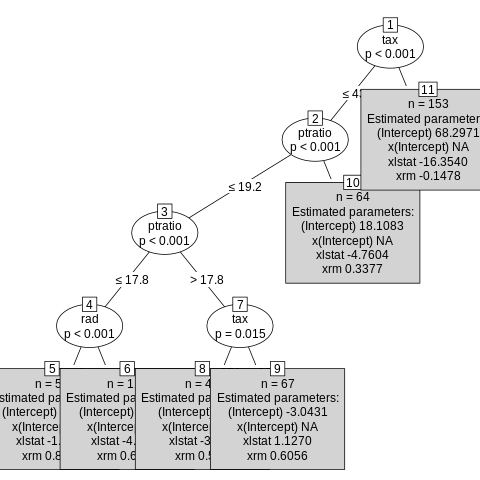

In [15]:
%%R
# Visualize the tree
plot(mob.ols)

In [16]:
%%R
# Extract coefficients for all terminal nodes
coef(mob.ols)

   (Intercept) x(Intercept)     xlstat        xrm
5    -5.749107           NA  -1.851394  0.8565573
6     9.508023           NA  -4.469789  0.6314902
8     8.683684           NA  -3.454158  0.5840467
9    -3.043095           NA   1.127000  0.6055670
10   18.108345           NA  -4.760427  0.3376816
11   68.297087           NA -16.354006 -0.1477939


In [17]:
%%R
# Summary for a specific node (e.g., node 7, if it exists)
if (length(nodeids(mob.ols, terminal = TRUE)) >= 7) {
  summary(mob.ols, node = 7)
} else {
  cat("Node 7 does not exist. Check terminal nodes with nodeids(mob.ols, terminal = TRUE).\n")
}

# Check parameter stability tests for a specific node
if (length(nodeids(mob.ols, terminal = TRUE)) >= 7) {
  sctest(mob.ols, node = 7)
}

Node 7 does not exist. Check terminal nodes with nodeids(mob.ols, terminal = TRUE).


#### Evaluate model performance


In [18]:
%%R
# Evaluate model performance
# Compute mean squared error (MSE)
mse <- mean((BostonHousing$medv - fitted(mob.ols))^2)
cat("Mean Squared Error:", mse, "\n")

# Compute AIC
aic <- AIC(mob.ols)
cat("AIC:", aic, "\n")

# Step 7: Make predictions on the same data
predictions <- predict(mob.ols, newdata = BostonHousing)
head(predictions)  # View first few predictions

Mean Squared Error: 12.63648 
AIC: 2669.484 
1 2 3 4 5 6 
5 5 5 8 8 8 


### MOB - Logistic Regression

Model-based Recursive Partitioning (MOB) with a logistic regression model is a statistical method that integrates recursive partitioning (similar to decision trees) with logistic regression to identify subgroups in the data where the relationship between predictors and a binary response variable differs.

Key Concepts of MOB with Logistic Regression

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate logistic regression model in each node.

-   It tests for parameter instability in the logistic regression coefficients using partitioning variables to determine where to split the data. The result is a tree where each terminal node has its own logistic regression model with potentially different coefficients (e.g., different log-odds ratios).

`Logistic Regression`:

-   Logistic regression models the probability of a binary outcome (e.g., 0/1, success/failure) as a function of predictors, using the logit link function.

-   In MOB, logistic regression is fitted in each node, allowing coefficients to vary across subgroups.

In this section of the tutorial, we will demonstrate how to use the `mob` function from the {partykit} package to perform Model-based Recursive Partitioning (MOB) with Logistic Regression. We will use the `PimaIndiansDiabetes` dataset from the `mlbench` package as an example.

#### Data

 We will use the PimaIndiansDiabetes dataset from the mlbench package as an example.

In [19]:
%%R
# Load and prepare the PimaIndiansDiabetes dataset
data("PimaIndiansDiabetes", package = "mlbench")
# Ensure diabetes is a binary factor
PimaIndiansDiabetes$diabetes <- factor(PimaIndiansDiabetes$diabetes, levels = c("neg", "pos"))

#### Define function for logistic regression




In [20]:
%%R
# Define a fitting function for logistic regression
logreg_fit <- function(y, x, start = NULL, weights = NULL, offset = NULL, ...) {
  glm(y ~ x, family = binomial(link = "logit"), ...)
}

#### Fit the MOB logistic regression model

In [21]:
%%R
# Fit the MOB model
# Model: diabetes ~ glucose + mass (logistic regression)
# Partitioning variables: all other variables
mob.logit <- mob(diabetes ~ glucose + mass | pregnant + pressure + triceps + insulin + pedigree + age,
             data = PimaIndiansDiabetes,
             fit = logreg_fit,  # Specify the logistic regression fitting function
             control = mob_control(minsplit = 40, alpha = 0.05))
print(mob.logit)

Model-based recursive partitioning (logreg_fit)

Model formula:
diabetes ~ glucose + mass | pregnant + pressure + triceps + insulin + 
    pedigree + age

Fitted party:
[1] root
|   [2] age <= 28: n = 367
|        (Intercept) x(Intercept)     xglucose        xmass 
|        -9.47321487           NA   0.04003050   0.09470717 
|   [3] age > 28: n = 401
|        (Intercept) x(Intercept)     xglucose        xmass 
|        -5.85877381           NA   0.02817837   0.06741752 

Number of inner nodes:    1
Number of terminal nodes: 2
Number of parameters per node: 4
Objective function: 363.3529


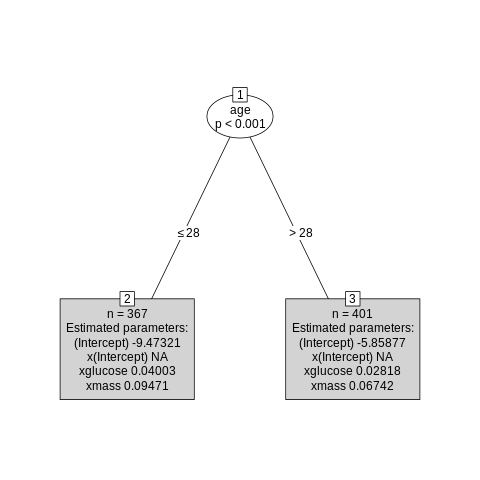

In [26]:
%%R
# Visualize the tree
plot(mob.logit)

In [27]:
%%R
# Extract coefficients for all terminal nodes
coef(mob.logit)

  (Intercept) x(Intercept)   xglucose      xmass
2   -9.473215           NA 0.04003050 0.09470717
3   -5.858774           NA 0.02817837 0.06741752


In [28]:
%%R
# Summary for a specific node (e.g., node 3, if it exists)
terminal_nodes <- nodeids(mob.logit, terminal = TRUE)
if (length(terminal_nodes) >= 3) {
  summary(logit, node = 3)
} else {
  cat("Node 3 does not exist. Check terminal nodes with nodeids(mob.logit, terminal = TRUE): ",
      terminal_nodes, "\n")
}

# Check parameter stability tests for a specific node
if (length(terminal_nodes) >= 3) {
  sctest(mob_logit, node = 3)
}

Node 3 does not exist. Check terminal nodes with nodeids(mob.logit, terminal = TRUE):  2 3 


#### Evaluate model performance

In [29]:
%%R -w 500 -h 450 -u px
# Evaluate model performance
# Compute misclassification error
predictions <- predict(mob.logit, newdata = PimaIndiansDiabetes, type = "response")
predicted_classes <- ifelse(predictions > 0.5, "pos", "neg")
misclassification_error <- mean(predicted_classes != PimaIndiansDiabetes$diabetes)
cat("Misclassification Error:", misclassification_error, "\n")

Misclassification Error: 0.2252604 


In [30]:
%%R
# Compute AIC
aic <- AIC(mob.logit)
cat("AIC:", aic, "\n")

AIC: 740.7059 


### MOB - Multinomial Logistic Regression

Model-based Recursive Partitioning (MOB) with a multinomial logistic regression model is a statistical method that combines recursive partitioning (similar to decision trees) with multinomial logistic regression to identify subgroups in the data where the relationship between predictors and a categorical response variable (with three or more levels) differs.

Key Concepts of MOB with Multinomial Logistic Regression:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate multinomial logistic regression model in each node.

-   It tests for parameter instability in the multinomial regression coefficients using partitioning variables to determine where to split the data.

-   The result is a tree where each terminal node has its own multinomial logistic regression model with potentially different coefficients (e.g., different log-odds ratios for each category).

`Multinomial Logistic Regression`:

-   Multinomial logistic regression models the probabilities of a categorical outcome with three or more levels (e.g., setosa, versicolor, virginica in the Iris dataset) as a function of predictors.

-   It uses one category as the reference and estimates log-odds for other categories relative to it, typically via maximum likelihood estimation.

-   In MOB, multinomial regression is fitted in each node, allowing coefficients to vary across subgroups.

I’ll use the Iris dataset which has a multinomial response variable (Species with three categories: setosa, versicolor, virginica). This is a standard dataset for multinomial models.

Below is a step-by-step guide to fitting MOB with a multinomial logistic regression model on the Iris dataset using the partykit package for MOB and the nnet package for multinomial logistic regression. The code is concise, executable, and includes data preparation, model fitting, visualization, and evaluation.

#### Data

In [31]:
%%R
# Load and prepare the Iris dataset
data("iris", package = "datasets")
# Ensure Species is a factor with three levels
iris$Species <- factor(iris$Species)

#### Define function for multinomial logistic regression


In [32]:
%%R
# Define a fitting function for multinomial logistic regression
multinom_fit <- function(y, x, start = NULL, weights = NULL, offset = NULL, ...) {
  nnet::multinom(y ~ x, trace = FALSE, ...)
}

#### Define estfun method for multinom objects

In [33]:
%%R
# Define estfun method for multinom objects
estfun.multinom <- function(x, ...) {
  # Extract model components
  X <- model.matrix(x)
  y <- model.response(model.frame(x))
  fitted <- fitted(x)
  n <- nrow(X)
  k <- ncol(fitted)  # Number of categories
  p <- ncol(X) / (k - 1)  # Parameters per category (excluding reference)

  # Compute scores
  scores <- matrix(0, nrow = n, ncol = p * (k - 1))
  for (j in 1:(k - 1)) {
    # Score contributions for category j vs reference
    idx <- ((j - 1) * p + 1):(j * p)
    resid <- as.numeric(y == levels(y)[j]) - fitted[, j]
    scores[, idx] <- resid * X[, 1:p]
  }
  return(scores)
}

#### Fit the MOB multinomial logistic regression model

In [34]:
%%R
# Fit the MOB model
# Model: Species ~ Petal.Length + Petal.Width (multinomial logistic regression)
# Partitioning variables: Sepal.Length + Sepal.Width
mob.multinom <- mob(Species ~ Petal.Length + Petal.Width | Sepal.Length + Sepal.Width,
              data = iris,
              fit = multinom_fit,
              control = mob_control(minsplit = 20, alpha = 0.05))
# Print the tree
print(mob.multinom )

  the leading minor of order 2 is not positive



Model-based recursive partitioning (multinom_fit)

Model formula:
Species ~ Petal.Length + Petal.Width | Sepal.Length + Sepal.Width

Fitted party:
[1] root: n = 150
               (Intercept) x(Intercept) xPetal.Length xPetal.Width
    versicolor   -12.27944    -12.27944      7.975972     6.427855
    virginica    -34.67526    -34.67526     13.649023    16.831477 

Number of inner nodes:    0
Number of terminal nodes: 1
Number of parameters per node: 8
Objective function: 10.28802


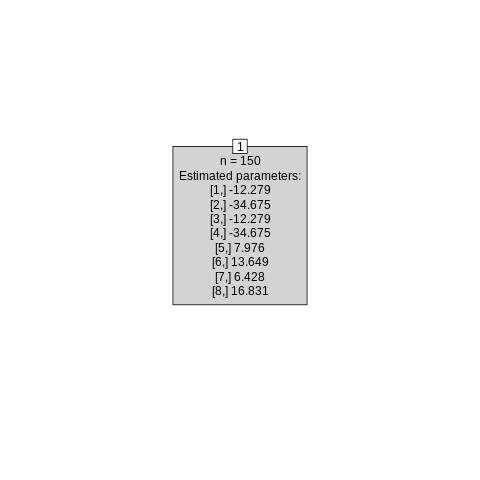

In [35]:
%%R
# Visualize the tree
plot(mob.multinom )

In [36]:
%%R
# Extract coefficients for all terminal nodes
coef(mob.multinom )

           (Intercept) x(Intercept) xPetal.Length xPetal.Width
versicolor   -12.27944    -12.27944      7.975972     6.427855
virginica    -34.67526    -34.67526     13.649023    16.831477


In [37]:
%%R
# Summary for a specific node (e.g., node 3, if it exists)
terminal_nodes <- nodeids(mob.multinom , terminal = TRUE)
if (length(terminal_nodes) >= 3) {
  summary(mob.multinom , node = 3)
} else {
  cat("Node 3 does not exist. Check terminal nodes with nodeids(mob.multinom , terminal = TRUE): ",
      terminal_nodes, "\n")
}

# Check parameter stability tests for a specific node
if (length(terminal_nodes) >= 3) {
  sctest(mob.multinom , node = 3)
}

Node 3 does not exist. Check terminal nodes with nodeids(mob.multinom , terminal = TRUE):  1 


#### Evaluate model performance

In [38]:
%%R
# Evaluate model performance
# Compute misclassification error
predictions <- predict(mob.multinom , newdata = iris, type = "class")  # Use type = "class"
misclassification_error <- mean(predictions != iris$Species)
cat("Misclassification Error:", misclassification_error, "\n")

Misclassification Error: 0.04 


In [39]:
%%R
#  Compute predicted probabilities
prob_predictions <- predict(mob.multinom, newdata = iris, type = "probs")
head(prob_predictions)  # View first few predicted probabilities

     setosa   versicolor    virginica
1 0.9999945 5.521036e-06 4.387154e-21
2 0.9999945 5.521036e-06 4.387154e-21
3 0.9999975 2.486737e-06 1.120507e-21
4 0.9999877 1.225772e-05 1.717709e-20
5 0.9999945 5.521036e-06 4.387154e-21
6 0.9997815 2.184846e-04 7.627153e-18


In [ ]:
%%R
# Compute AIC
aic <- AIC(mob.multinom )
cat("AIC:", aic, "\n")

### MOB - Poisson Regression

Model-based Recursive Partitioning (MOB) with a Poisson regression model is a statistical method that combines recursive partitioning (similar to decision trees) with Poisson regression to identify subgroups in the data where the relationship between predictors and a count response variable differs.

Key Concepts of MOB with Poisson Regression:

`MOB Framework`:

-   MOB recursively partitions the data into subgroups (nodes) based on partitioning variables, fitting a separate Poisson regression model in each node.

-   It tests for parameter instability in the Poisson regression coefficients using partitioning variables to determine where to split the data.

-   The result is a tree where each terminal node has its own Poisson regression model with potentially different coefficients (e.g., different log-rate parameters).

`Poisson Regression`:

-   Poisson regression models the expected count of an event (a non-negative integer) as a function of predictors, using a log link function.

-   It assumes the response follows a Poisson distribution, suitable for count data (e.g., number of events, occurrences).

-   In MOB, Poisson regression is fitted in each node, allowing coefficients to vary across subgroups.

To fit Model-based Recursive Partitioning (MOB) with a Poisson regression model using the PimaIndiansDiabetes dataset from the mlbench package, we need a count response variable suitable for Poisson regression. The PimaIndiansDiabetes dataset does not have a natural count variable (e.g., pregnant could be treated as a count of pregnancies, but it’s not typically modeled as a Poisson outcome due to its distribution). Instead, I’ll use the Insurance dataset from the MASS package, which includes a count variable (Claims, the number of insurance claims) ideal for Poisson regression. If you prefer to use PimaIndiansDiabetes with a specific count variable (e.g., pregnant) or another dataset, let me know, and I can adjust the approach.

Below is a step-by-step guide to fitting MOB with a Poisson regression model on the Insurance dataset. The code is concise, executable, and includes data preparation, model fitting, visualization, and evaluation.

#### Data

In [40]:
%%R
#  Load and prepare the Insurance dataset
data("Insurance", package = "MASS")
# Ensure categorical variables are factors
Insurance$District <- factor(Insurance$District)
Insurance$Group <- factor(Insurance$Group)
Insurance$Age <- factor(Insurance$Age)


#### Define function for Poisson regression

In [41]:
%%R
# Define a fitting function for Poisson regression
poisson_fit <- function(y, x, start = NULL, weights = NULL, offset = NULL, ...) {
  glm(y ~ x, family = poisson(link = "log"), ...)
}

#### Fit the MOB Poisson regression model

In [42]:
%%R
# Fit the MOB model
# Model: Claims ~ Holders (Poisson regression)
# Partitioning variables: District + Group + Age
mob.poisson <- mob(Claims ~ Holders | District + Group + Age,
             data = Insurance,
             fit = poisson_fit,  # Specify the Poisson regression fitting function
             control = mob_control(minsplit = 10, alpha = 0.05))
# Print the tree
print(mob.poisson)

Model-based recursive partitioning (poisson_fit)

Model formula:
Claims ~ Holders | District + Group + Age

Fitted party:
[1] root
|   [2] Age <= 30-35
|   |   [3] District in 1, 2: n = 24
|   |        (Intercept) x(Intercept)     xHolders 
|   |        2.802704335           NA  0.002895579 
|   |   [4] District in 3, 4: n = 24
|   |        (Intercept) x(Intercept)     xHolders 
|   |        1.615950096           NA  0.009426978 
|   [5] Age > 30-35: n = 16
|        (Intercept) x(Intercept)     xHolders 
|       4.0381623029           NA 0.0005999035 

Number of inner nodes:    2
Number of terminal nodes: 3
Number of parameters per node: 3
Objective function: 305.4251


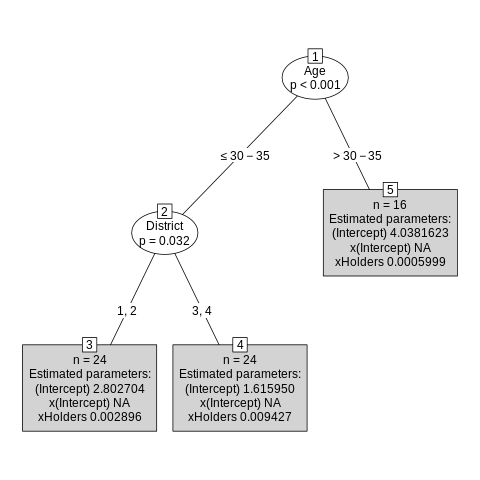

In [43]:
%%R
# Visualize the tree
plot(mob.poisson)

In [44]:
%%R
# Extract coefficients for all terminal nodes
coef(mob.poisson)

  (Intercept) x(Intercept)     xHolders
3    2.802704           NA 0.0028955794
4    1.615950           NA 0.0094269777
5    4.038162           NA 0.0005999035


In [ ]:
%%R
# Summary for a specific node (e.g., node 3, if it exists)
terminal_nodes <- nodeids(mob.poisson, terminal = TRUE)
if (length(terminal_nodes) >= 3) {
  summary(mob.poisson, node = 3)
} else {
  cat("Node 3 does not exist. Check terminal nodes with nodeids(mob.poisson, terminal = TRUE): ",
      terminal_nodes, "\n")
}

#### Evaluate model performance

In [45]:
%%R
# Evaluate model performance
# Compute mean squared error (MSE) for count predictions
predictions <- predict(mob.poisson, newdata = Insurance, type = "response")
mse <- mean((Insurance$Claims - predictions)^2)
cat("Mean Squared Error:", mse, "\n")

# Compute AIC
aic <- AIC(mob.poisson)
cat("AIC:", aic, "\n")

Mean Squared Error: 420.4272 
AIC: 626.8503 


## Summary and Conculusion

In this tutorial, we explored Model-based Recursive Partitioning (MOB) using the {partykit} package in R. We demonstrated how to fit MOB models with Ordinary Least Squares (OLS), logistic regression, multinomial logistic regression, and Poisson regression. The key steps included data preparation, model fitting, visualization, and evaluation of model performance. At the end of each section, we provided code snippets to illustrate the process and results. This approach allows for flexible modeling of complex relationships in data, capturing heterogeneity across subgroups while maintaining statistical rigor through formal hypothesis testing.


## References

1.  Hothorn, T., Hornik, K., & Zeileis, A. (2015). partykit: A Toolkit for Recursive Partytioning. Journal of Statistical Software, 32(1), 1-26. doi:10.18637/jss.v032.i01

2.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction (2nd Edition). Springer.

3.  Zeileis, A., Hothorn, T., & Hornik, K. (2008). Model-Based Recursive Partitioning. Journal of Computational and Graphical Statistics, 17(2), 492–514.

4.  [party with the mob: Model-Based Recursive Partitioning in R](https://cran.r-project.org/web/packages/party/vignettes/MOB.pdf)


